In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
def prepro(x) :
    for i in ['C34','C35','C38','C23','C30','C36','C10','C14','C21','C22','C26','C28','C29','C37','C40']:
        if i in x.columns :
            x = x.drop([i],axis=1)
    x = x.dropna(how = 'all',axis=1)
    x = x.dropna(axis=0)
    
    for i in x.columns :
        if type(x.loc[0,i]) == str:
            x[i] = x[i].apply(lambda x: x.split("_")[1])
            x[i] = x[i].astype('float64')
    int_list = []
    flt_list = []
    for i in x.columns :
        if len(x[i].value_counts()) ==1:
            x = x.drop(i,axis=1)
        elif len(x[i].apply(lambda x: str(x).split(".")[1] ).value_counts()) ==1 :
            int_list.append(i)
        else :
            flt_list.append(i)
            
    for i in int_list :
        if max(x[i]) > 32000 or min(x[i]) <-32000 :
            x[i] = x[i].astype('int32')
        elif max(x[i]) > 128 or min(x[i]) <-128 :
            x[i] = x[i].astype('int16')
        else :
            x[i] = x[i].astype('int8')
    for i in flt_list :
        x[i] = x[i].astype('float32')
    return x


def prepro_2(x) :
    int_list = []
    flt_list = []
    
    for i in x.columns :
        if x[i].dtype == 'float64':
            print(i)
            if len(x[i].apply(lambda x: 0 if math.isna(x) else str(x).split(".")[1]).value_counts()) ==1 :
                int_list.append(i)
            else :
                flt_list.append(i)
            
    for i in int_list :
        if max(x[i]) > 32000 or min(x[i]) <-32000 :
            x[i] = x[i].astype('int32')
        elif max(x[i]) > 128 or min(x[i]) <-128 :
            x[i] = x[i].astype('int16')
        else :
            x[i] = x[i].astype('int8')
    for i in flt_list :
        x[i] = x[i].astype('float32')
    return x


In [3]:
train = pd.read_csv('제조기술 문제1 상 train_data.csv')
train = prepro(train)

In [4]:
for i in train['C7'].unique() :
    globals()['train_{}'.format(i)] = train[train['C7']== i]
    
    for j in range(int(max(globals()['train_{}'.format(i)]['C41'])//3)+1) :
        condition = (globals()['train_{}'.format(i)]['C41'] <= (3*j)+1.5) & (globals()['train_{}'.format(i)]['C41'] > 3*(j-1)+1.5)
        
        globals()['train_{}_{}'.format(i,j+1)] = globals()['train_{}'.format(i)][condition]
        globals()['train_{}_{}'.format(i,j+1)] = globals()['train_{}_{}'.format(i,j+1)].drop_duplicates(['C64'],keep='last')

In [5]:
corr_t = pd.DataFrame()
for i in train['C7'].unique():
    for j in range(int(max(globals()['train_{}'.format(i)]['C41'])//3)+1) :
        globals()['corr_t_{}_{}'.format(i,j+1)] = globals()['train_{}_{}'.format(i,j+1)].corr()['C65']
        corr_t_col = list(corr_t.columns)
        corr_t = pd.concat([corr_t,globals()['corr_t_{}_{}'.format(i,j+1)]],axis=1)
        corr_t_col.append('{}_{}'.format(i,j+1))
        corr_t.columns = corr_t_col
corr_t = corr_t.loc[:'C63',:]  

In [8]:
train_fin = pd.DataFrame(set(train['C64']),columns=['C64'])
train_fin['C64'] = train_fin['C64'].astype('int16')
train_fin = pd.merge(train_fin,train[['C64','C33','C39','C20','C65']],on='C64')
train_fin = train_fin.drop_duplicates(['C64'],keep='last')

for i in train['C7'].unique():
    
    for j in range(int(max(globals()['train_{}'.format(i)]['C41'])//3)+1) :
        
        for k in corr_t.index.difference(['C39','C33','C20']) :
            if abs(corr_t.loc[k,'{}_{}'.format(i,j+1)]) >0.1:
                globals()['train_{}_{}'.format(i,j+1)]['{}_{}_{}'.format(i,j+1,k)] = globals()['train_{}_{}'.format(i,j+1)][k]
                train_fin = pd.merge(train_fin,globals()['train_{}_{}'.format(i,j+1)][['C64','{}_{}_{}'.format(i,j+1,k)]],on='C64',how='outer' )
                


In [15]:
math.isnan(train_fin.loc[4859,'1_2_C12'])

True

In [19]:
train_fin.loc[4859,'1_2_C12'] == np.nan

False

In [9]:
abs(train.corr()['C65']).sort_values(ascending=False)

C65    1.000000
C20    0.484384
C39    0.480760
C64    0.479469
C12    0.309891
C17    0.308096
C25    0.042078
C60    0.041348
C61    0.023005
C9     0.020159
C52    0.016119
C63    0.011843
C50    0.010345
C15    0.008612
C11    0.007972
C33    0.007340
C7     0.006905
C6     0.006114
C48    0.006072
C16    0.006071
C59    0.005978
C58    0.005795
C49    0.005201
C56    0.003873
C4     0.003727
C27    0.003656
C42    0.002831
C54    0.002115
C18    0.001871
C62    0.001731
C5     0.001611
C57    0.001060
C1     0.000653
C41    0.000648
C46    0.000648
C32    0.000603
C31    0.000244
Name: C65, dtype: float64

In [10]:
abs(train_fin.corr()['C65']).sort_values(ascending=False)

C65        1.000000
6_2_C9     0.845517
4_6_C17    0.822839
5_1_C17    0.805201
4_4_C17    0.802966
             ...   
1_4_C41    0.101322
6_2_C61    0.101218
4_6_C57    0.101146
5_1_C49    0.100753
C33        0.011105
Name: C65, Length: 122, dtype: float64

In [22]:
train_fin.isnull().sum().sort_values(ascending=False)

1_4_C9     15882
1_4_C4     15882
1_4_C63    15882
1_4_C61    15882
1_4_C60    15882
           ...  
4_2_C12        0
4_1_C63        0
4_1_C17        0
4_1_C12        0
C64            0
Length: 122, dtype: int64

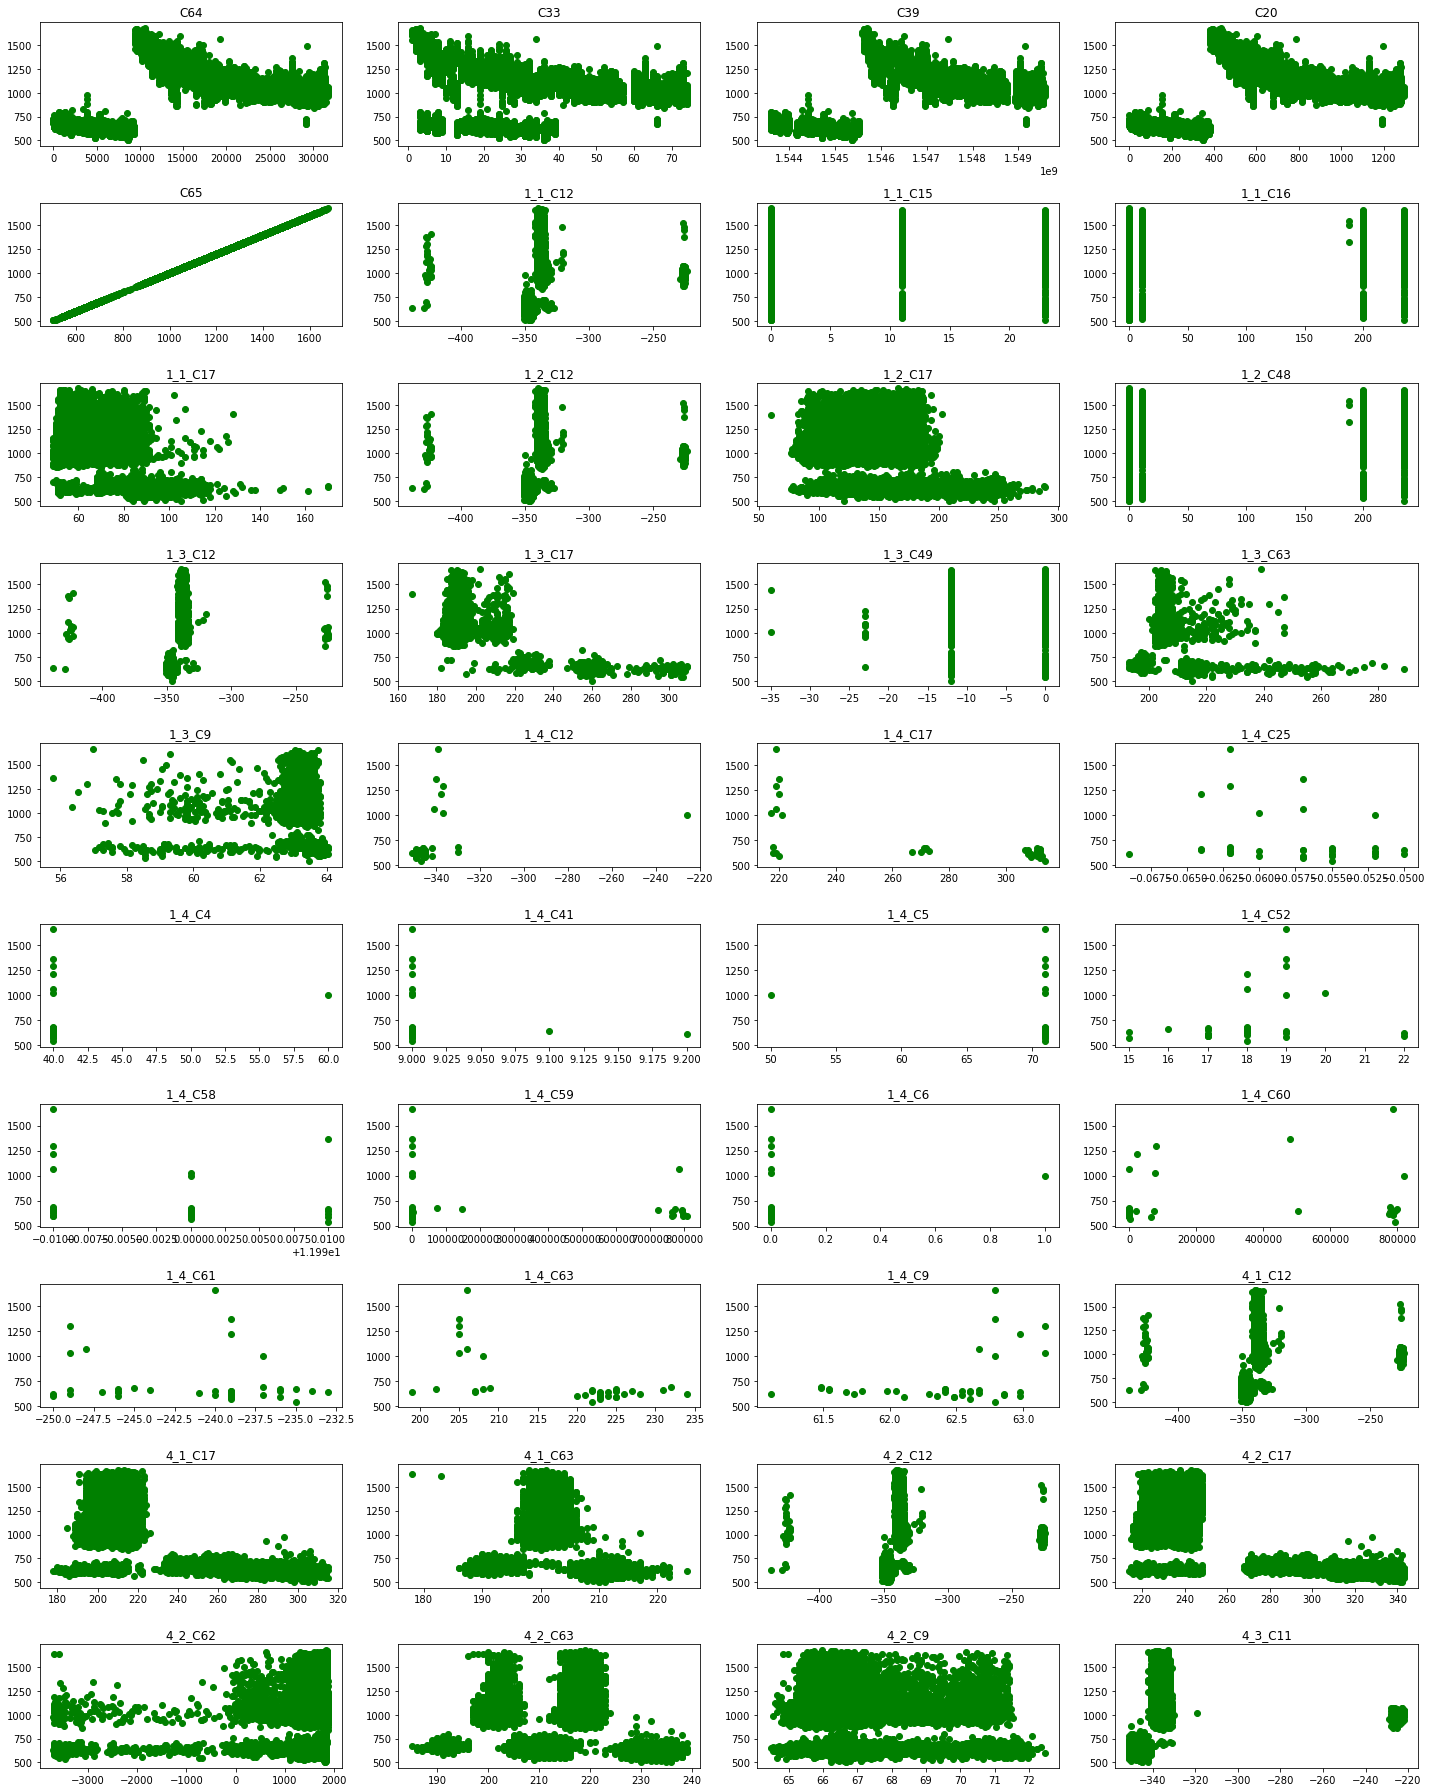

In [11]:
plt.figure(figsize=(20,25))
n=0
for i in train_fin.columns[:40]:
    n+=1
    plt.subplot(10,4,n)
    plt.scatter(train_fin[i],train_fin['C65'],c='green')
    plt.title(i)
    plt.tight_layout()
plt.show()

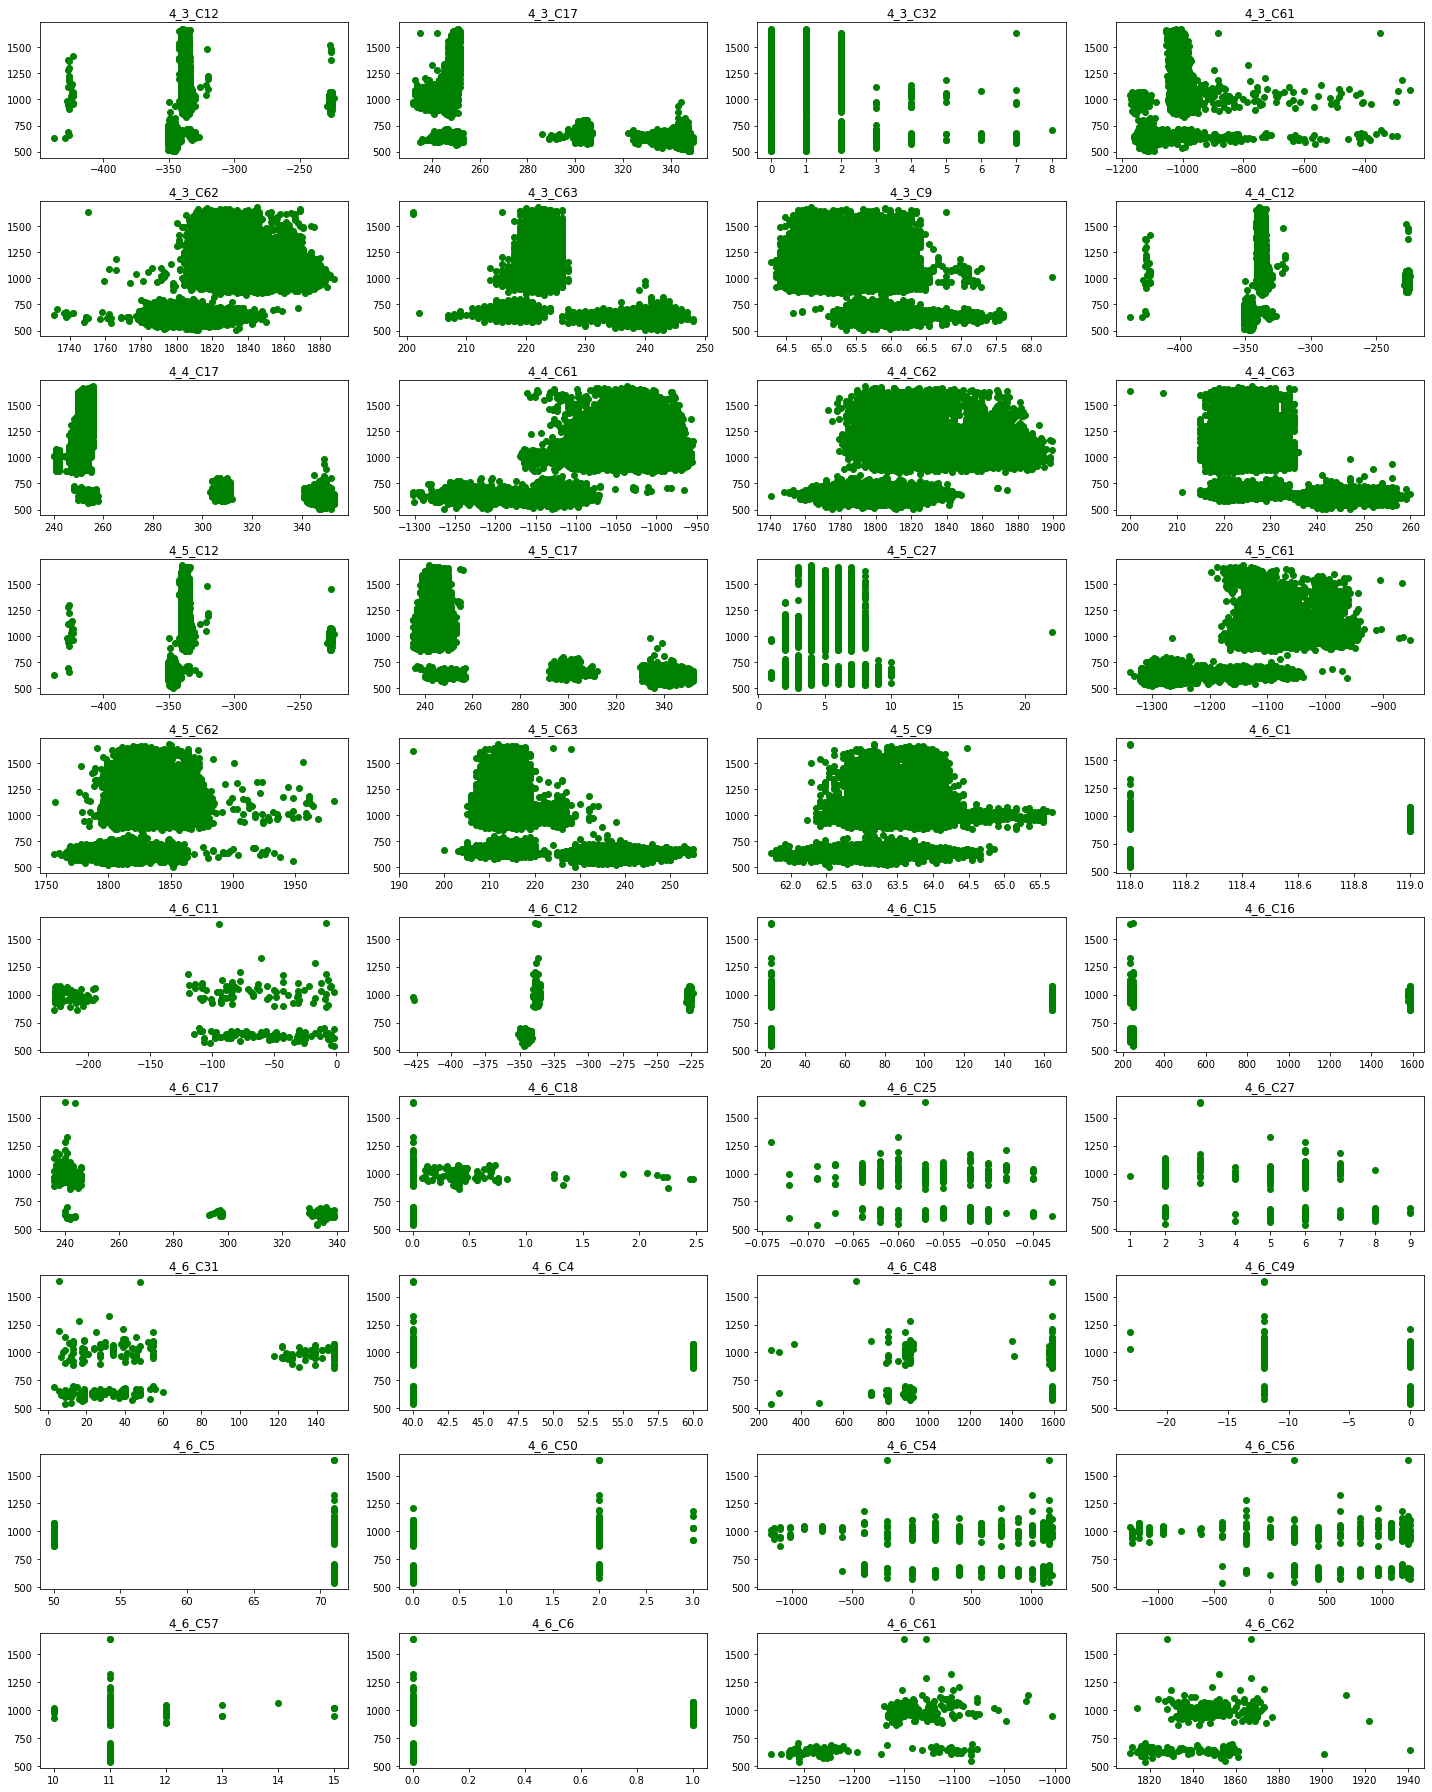

In [12]:
plt.figure(figsize=(20,25))
n=0
for i in train_fin.columns[40:80]:
    n+=1
    plt.subplot(10,4,n)
    plt.scatter(train_fin[i],train_fin['C65'],c='green')
    plt.title(i)
    plt.tight_layout()
plt.show()

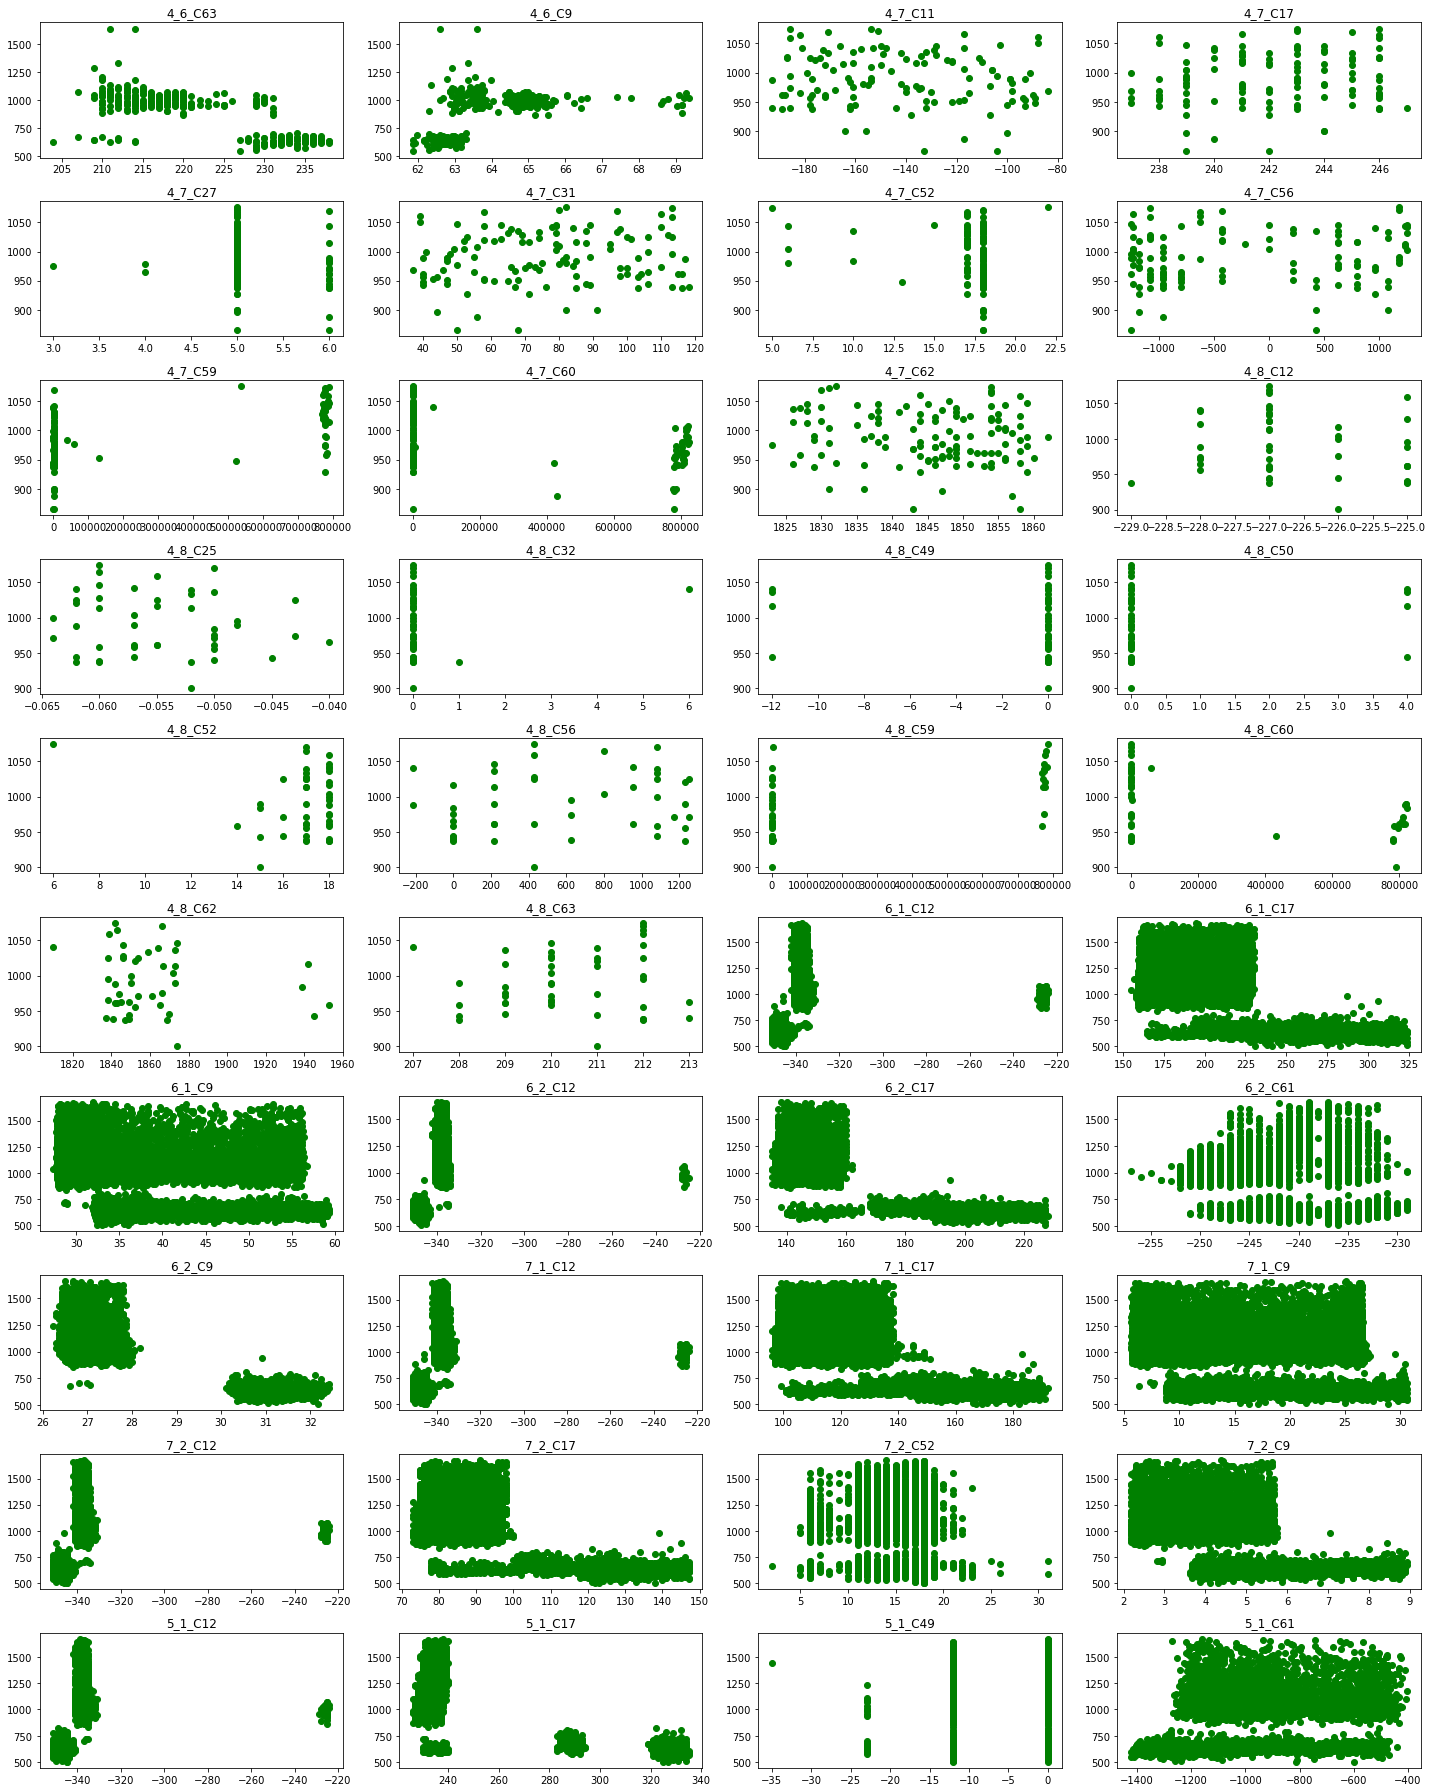

In [13]:
plt.figure(figsize=(20,25))
n=0
for i in train_fin.columns[80:120]:
    n+=1
    plt.subplot(10,4,n)
    plt.scatter(train_fin[i],train_fin['C65'],c='green')
    plt.title(i)
    plt.tight_layout()
plt.show()

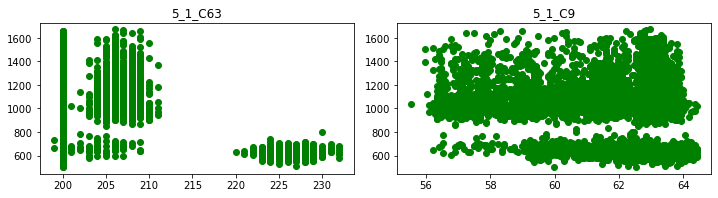

In [14]:
plt.figure(figsize=(20,25))
n=0
for i in train_fin.columns[120:]:
    n+=1
    plt.subplot(10,4,n)
    plt.scatter(train_fin[i],train_fin['C65'],c='green')
    plt.title(i)
    plt.tight_layout()
plt.show()